In [9]:
!pip install shap


In [10]:
import pandas as pd
import numpy as np

# Create 1500 days of synthetic data
dates = pd.date_range(start='2015-01-01', periods=1500)
values = np.sin(np.arange(1500)/40) * 10 + np.random.normal(0, 1, 1500)

df = pd.DataFrame({'ds': dates, 'y': values})


In [11]:
df['lag1'] = df['y'].shift(1)
df['lag7'] = df['y'].shift(7)
df['lag30'] = df['y'].shift(30)

df = df.dropna()


In [12]:
train = df.iloc[:-60]
test = df.iloc[-60:]


In [13]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=200)
model.fit(train[['lag1','lag7','lag30']], train['y'])


RandomForestRegressor(n_estimators=200)

In [14]:
pred = model.predict(test[['lag1','lag7','lag30']])
pred


array([-11.0933767 ,  -9.53960415,  -9.58732511, -11.00022246,
        -9.93892305, -10.03673667,  -9.36658776,  -9.3529347 ,
        -9.47316698,  -9.73277097,  -9.61275698, -10.36044356,
        -9.06900725,  -9.54849571, -10.0220612 ,  -9.21433467,
        -9.98764616,  -8.56333609,  -9.840976  ,  -9.72088639,
        -9.33631989,  -9.63800498,  -8.18753511,  -8.17823564,
        -8.78258325,  -8.30136599,  -8.7639611 ,  -8.73615886,
        -8.28948979,  -8.53675369,  -8.37336002,  -7.1730875 ,
        -8.60139433,  -7.31776204,  -7.35797842,  -9.49385656,
        -8.7931642 ,  -7.99513853,  -6.60508778,  -5.99736494,
        -9.37407059,  -7.44625938,  -6.23447594,  -3.5718524 ,
        -6.06470963,  -5.68435948,  -6.74747263,  -4.42213685,
        -4.96607601,  -5.34987394,  -5.22754914,  -4.15194599,
        -4.9349365 ,  -3.41825516,  -3.39294297,  -2.87140956,
        -3.04405034,  -4.30752064,  -2.29692131,  -2.07264945])

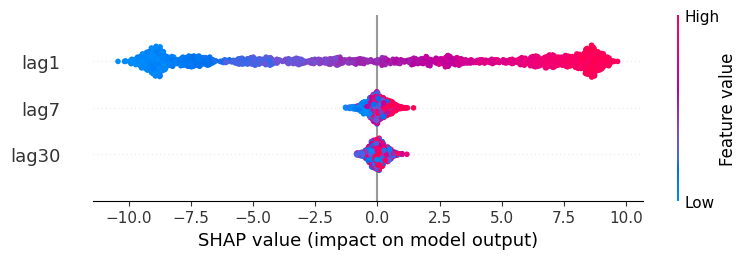

In [15]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train[['lag1','lag7','lag30']])

shap.summary_plot(shap_values, train[['lag1','lag7','lag30']])


RMSE: 1.3060735346180612
MAE: 1.0728314009051785
lag1 SHAP importance: 6.090388438230037
lag7 SHAP importance: 0.34965772680256824
lag30 SHAP importance: 0.2288058334880765


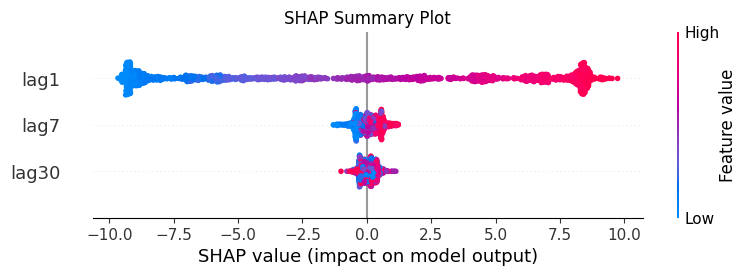

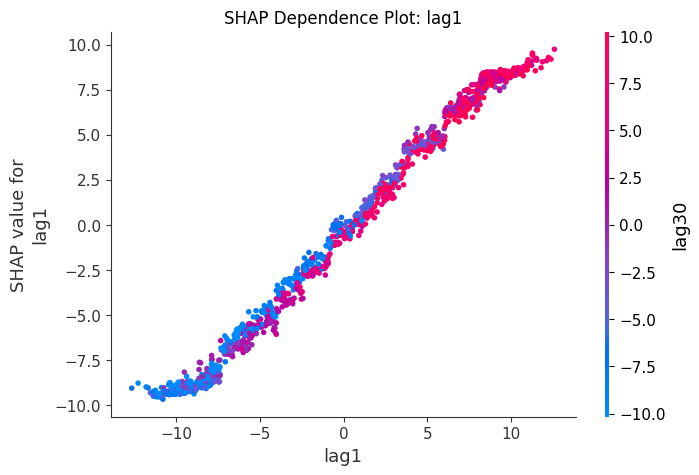

In [16]:
# ===========================================================
#  Advanced Time Series Forecasting using RandomForest + SHAP
# ===========================================================

import pandas as pd
import numpy as np
import shap
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# -----------------------
# 1. Create Time-Series Data
# -----------------------
dates = pd.date_range(start='2015-01-01', periods=1500)
values = np.sin(np.arange(1500) / 40) * 10 + np.random.normal(0, 1, 1500)

df = pd.DataFrame({'ds': dates, 'y': values})

# -----------------------
# 2. Feature Engineering (Lag Features)
# -----------------------
df['lag1'] = df['y'].shift(1)
df['lag7'] = df['y'].shift(7)
df['lag30'] = df['y'].shift(30)

df = df.dropna()

# -----------------------
# 3. Train/Test Split
# -----------------------
train = df.iloc[:-60]
test = df.iloc[-60:]

X_train = train[['lag1', 'lag7', 'lag30']]
y_train = train['y']

X_test = test[['lag1', 'lag7', 'lag30']]
y_test = test['y']

# -----------------------
# 4. RandomForest Model
# -----------------------
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=8,
    random_state=42
)

model.fit(X_train, y_train)

# -----------------------
# 5. Forecasting
# -----------------------
pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, pred))
mae = mean_absolute_error(y_test, pred)

print("RMSE:", rmse)
print("MAE:", mae)

# -----------------------
# 6. SHAP Explainability
# -----------------------
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train, show=False)
plt.title("SHAP Summary Plot")
plt.savefig("shap_summary.png")

# Additional SHAP dependence plot
shap.dependence_plot("lag1", shap_values, X_train, show=False)
plt.title("SHAP Dependence Plot: lag1")
plt.savefig("shap_dependence_lag1.png")

# Print top features by mean SHAP value
shap_importance = np.abs(shap_values).mean(axis=0)
for feature, value in zip(X_train.columns, shap_importance):
    print(f"{feature} SHAP importance: {value}")
